In [1]:
# Import libraries
import awswrangler as wr
import numpy as np
import pandas as pd

from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
from sklearn.metrics import mean_absolute_error
print(tf.__version__)


2.7.0


In [2]:
dataset = 'feature_extract'

In [3]:
# Read in small dataset
train = pd.read_csv('Endometriosis_subset_train_feature_extract.csv')

In [4]:
train

,meth_id,meth_id.1,Endometriosis,Cycle_Phase,Stage,Institute,Batch,cg10148841,cg21351005,cg07701590,...,cg11746597,cg04949246,cg10423915,cg02890044,cg27232569,cg21012362,cg07834475,cg03968010,cg03591760,Endometriosis_int
0,202184900066_R02C01,202184900066_R02C01,Yes,PE,I-II,UCSF,1,2.347990,0.313501,3.573117,...,1.347776,4.360888,0.726539,4.040015,1.121798,-4.933267,-0.337099,1.242466,3.448556,1.0
1,201980430023_R03C01,201980430023_R03C01,No,PE,CONTROL,UCSF,1,2.289911,0.239189,3.025094,...,1.365900,4.354145,0.808408,3.984398,0.587009,-4.955369,-0.520149,1.624613,3.227609,0.0
2,202875000120_R08C01,202875000120_R08C01,Yes,SE,III-IV,"IMB, UQ",2,2.299987,0.305986,3.284118,...,1.242204,3.912742,0.877154,4.082631,1.084806,-4.601202,-0.439993,1.287716,3.753529,1.0
3,202875000094_R02C01,202875000094_R02C01,No,SE,CONTROL,"CIR, University of Edinburgh",2,2.252749,0.192952,3.987926,...,1.315315,4.287660,0.582178,4.117236,0.690135,-4.758822,-0.219093,1.492483,3.190790,0.0
4,202878330076_R08C01,202878330076_R08C01,Yes,Menstrual,I-II,"IMB, UQ",2,2.302819,-0.134144,3.673731,...,0.697425,4.270304,0.632474,3.707036,0.491488,-4.531519,-0.820958,1.518575,3.150496,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,201959740167_R03C01,201959740167_R03C01,Yes,SE,I-II,UCSF,1,1.885746,0.056798,3.913466,...,1.297838,4.537442,0.743840,3.945745,0.338576,-4.829207,-0.321019,1.707829,3.689319,1.0
789,201980430021_R07C01,201980430021_R07C01,No,SE,CONTROL,"IMB, UQ",1,2.395129,0.515290,3.700942,...,1.211256,3.856570,0.900053,4.033375,0.490900,-4.625232,-1.064785,1.720572,3.487995,0.0
790,201959740096_R08C01,201959740096_R08C01,Yes,SE,I-II,Oxford,1,1.546711,-0.129159,3.584211,...,0.888650,4.038716,0.909995,3.956418,0.449780,-5.209440,0.064984,1.804602,3.365239,1.0
791,202176300059_R02C01,202176300059_R02C01,No,SE,CONTROL,"IMB, UQ",1,1.994591,0.328273,3.913027,...,1.259675,4.025205,1.055743,3.835343,0.734801,-4.643538,-0.472041,1.469043,3.568109,0.0


In [5]:
# Set axis to IDs
train.set_axis(train['meth_id'], inplace = True)

In [6]:
# Drop the ID cols 
cols_drop = ['meth_id', 'meth_id.1']
train.drop(columns=cols_drop, inplace = True)

In [7]:
train['Cycle_Phase'].value_counts()

PE           378
SE           367
Menstrual     48
Name: Cycle_Phase, dtype: int64

In [8]:
# Change Endo Yes/No to binary
train['Cycle_Phase_1'] = np.where(train['Cycle_Phase'] == 'PE', 0, '')
train['Cycle_Phase_2'] = np.where(train['Cycle_Phase'] == 'SE', 1, '')
train['Cycle_Phase_3'] = np.where(train['Cycle_Phase'] == 'Menstrual', 2, '')
train['Cycle_Phase_int'] = train['Cycle_Phase_1'] + train['Cycle_Phase_2'] + train['Cycle_Phase_3'] 

In [9]:
train

,Endometriosis,Cycle_Phase,Stage,Institute,Batch,cg10148841,cg21351005,cg07701590,cg13630693,cg16774853,...,cg27232569,cg21012362,cg07834475,cg03968010,cg03591760,Endometriosis_int,Cycle_Phase_1,Cycle_Phase_2,Cycle_Phase_3,Cycle_Phase_int
meth_id,,,,,,,,,,,,,,,,,,,,,
202184900066_R02C01,Yes,PE,I-II,UCSF,1,2.347990,0.313501,3.573117,3.268060,2.728346,...,1.121798,-4.933267,-0.337099,1.242466,3.448556,1.0,0,,,0
201980430023_R03C01,No,PE,CONTROL,UCSF,1,2.289911,0.239189,3.025094,3.016290,2.977906,...,0.587009,-4.955369,-0.520149,1.624613,3.227609,0.0,0,,,0
202875000120_R08C01,Yes,SE,III-IV,"IMB, UQ",2,2.299987,0.305986,3.284118,3.484686,3.333019,...,1.084806,-4.601202,-0.439993,1.287716,3.753529,1.0,,1,,1
202875000094_R02C01,No,SE,CONTROL,"CIR, University of Edinburgh",2,2.252749,0.192952,3.987926,3.606494,3.179261,...,0.690135,-4.758822,-0.219093,1.492483,3.190790,0.0,,1,,1
202878330076_R08C01,Yes,Menstrual,I-II,"IMB, UQ",2,2.302819,-0.134144,3.673731,3.118974,3.297359,...,0.491488,-4.531519,-0.820958,1.518575,3.150496,1.0,,,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201959740167_R03C01,Yes,SE,I-II,UCSF,1,1.885746,0.056798,3.913466,2.943395,3.225094,...,0.338576,-4.829207,-0.321019,1.707829,3.689319,1.0,,1,,1
201980430021_R07C01,No,SE,CONTROL,"IMB, UQ",1,2.395129,0.515290,3.700942,2.910992,3.206506,...,0.490900,-4.625232,-1.064785,1.720572,3.487995,0.0,,1,,1
201959740096_R08C01,Yes,SE,I-II,Oxford,1,1.546711,-0.129159,3.584211,3.111629,1.978990,...,0.449780,-5.209440,0.064984,1.804602,3.365239,1.0,,1,,1


In [10]:
y_train = train['Cycle_Phase_int']
x_train = train.iloc[:, 5:-5]

In [11]:
x_train

,cg10148841,cg21351005,cg07701590,cg13630693,cg16774853,cg04066596,cg07048017,cg19844718,cg14103631,cg26673784,...,cg27545296,cg11746597,cg04949246,cg10423915,cg02890044,cg27232569,cg21012362,cg07834475,cg03968010,cg03591760
meth_id,,,,,,,,,,,,,,,,,,,,,
202184900066_R02C01,2.347990,0.313501,3.573117,3.268060,2.728346,2.681214,1.970876,-2.472839,3.199940,2.665422,...,3.599949,1.347776,4.360888,0.726539,4.040015,1.121798,-4.933267,-0.337099,1.242466,3.448556
201980430023_R03C01,2.289911,0.239189,3.025094,3.016290,2.977906,2.568432,1.956175,-2.426175,3.579298,2.606907,...,3.639010,1.365900,4.354145,0.808408,3.984398,0.587009,-4.955369,-0.520149,1.624613,3.227609
202875000120_R08C01,2.299987,0.305986,3.284118,3.484686,3.333019,3.080705,1.886624,-2.267132,2.865602,1.698636,...,3.476067,1.242204,3.912742,0.877154,4.082631,1.084806,-4.601202,-0.439993,1.287716,3.753529
202875000094_R02C01,2.252749,0.192952,3.987926,3.606494,3.179261,2.804777,2.048927,-2.493711,4.028062,2.372059,...,3.513383,1.315315,4.287660,0.582178,4.117236,0.690135,-4.758822,-0.219093,1.492483,3.190790
202878330076_R08C01,2.302819,-0.134144,3.673731,3.118974,3.297359,3.259887,1.856780,-2.373472,3.144973,3.070226,...,3.664693,0.697425,4.270304,0.632474,3.707036,0.491488,-4.531519,-0.820958,1.518575,3.150496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201959740167_R03C01,1.885746,0.056798,3.913466,2.943395,3.225094,3.014139,1.981596,-2.446393,3.354422,2.184173,...,3.735080,1.297838,4.537442,0.743840,3.945745,0.338576,-4.829207,-0.321019,1.707829,3.689319
201980430021_R07C01,2.395129,0.515290,3.700942,2.910992,3.206506,3.231902,1.897361,-2.229029,3.634248,2.684170,...,3.735799,1.211256,3.856570,0.900053,4.033375,0.490900,-4.625232,-1.064785,1.720572,3.487995
201959740096_R08C01,1.546711,-0.129159,3.584211,3.111629,1.978990,2.259864,2.146537,-1.956159,2.918957,2.600392,...,3.833865,0.888650,4.038716,0.909995,3.956418,0.449780,-5.209440,0.064984,1.804602,3.365239


In [12]:
val = pd.read_csv('Endometriosis_subset_test_feature_extract.csv')

In [13]:
val = val.set_axis(val['meth_id'])

In [14]:
# Group ESE, MSE and LSE into SE 
val.loc[val['Cycle_Phase'].isin(['ESE', 'MSE', 'LSE']), 'Cycle_Phase'] = 'SE'

In [15]:
# Change Endo Yes/No to binary
val['Cycle_Phase_1'] = np.where(val['Cycle_Phase'] == 'PE', 0, '')
val['Cycle_Phase_2'] = np.where(val['Cycle_Phase'] == 'SE', 1, '')
val['Cycle_Phase_3'] = np.where(val['Cycle_Phase'] == 'Menstrual', 2, '')
val['Cycle_Phase_int'] = val['Cycle_Phase_1'] + val['Cycle_Phase_2'] + val['Cycle_Phase_3'] 

In [16]:
y_val = val['Cycle_Phase_int']
x_val = val.iloc[:, 6:-5]

In [17]:
test2 = pd.read_csv('Endometriosis_subset_test2_feature_extract.csv')

In [18]:
test2.set_index('meth_id', inplace = True)

In [19]:
# Change Endo Yes/No to binary
test2['Cycle_Phase_1'] = np.where(test2['Cycle_Phase'] == 'PE', 0, '')
test2['Cycle_Phase_2'] = np.where(test2['Cycle_Phase'] == 'SE', 1, '')
test2['Cycle_Phase_3'] = np.where(test2['Cycle_Phase'] == 'Menstrual', 2, '')
test2['Cycle_Phase_int'] = test2['Cycle_Phase_1'] + test2['Cycle_Phase_2'] + test2['Cycle_Phase_3'] 

In [20]:
y_test2 = test2['Cycle_Phase_int']
x_test2 = test2.iloc[:, 5:-5]

In [21]:
print(x_train.shape, x_val.shape, x_test2.shape)

(793, 45188) (199, 45188) (52, 45188)


In [22]:
print(y_train.shape, y_val.shape, y_test2.shape)

(793,) (199,) (52,)


In [23]:
x_train_df = x_train
x_val_df = x_val

In [24]:
feature_names = x_train.columns

In [25]:
import pandas as pd 
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import r2_score
import itertools 
from itertools import chain
from sklearn.model_selection import train_test_split
import scipy 
from scipy.stats import linregress

activation1 = 'relu'
activation2 = 'relu'
nodes = 500

    
# Convert to float32
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
x_val = np.asarray(x_val).astype('float32')
y_val = np.asarray(y_val).astype('float32')
x_test2 = np.asarray(x_test2).astype('float32')
y_test2 = np.asarray(y_test2).astype('float32')


# build model
model = Sequential()
model.add(Dense(nodes, input_dim=x_train.shape[1], activation = activation1))
model.add(Dense(nodes, activation= activation1))
model.add(Dense(nodes, activation=activation1))
model.add(Dense(nodes, activation=activation1))
model.add(Dense(nodes, activation=activation1))
model.add(Dense(nodes, activation=activation1))
model.add(Dense(nodes, activation=activation1))
model.add(Dense(nodes, activation=activation1))
model.add(Dense(nodes, activation='exponential'))
model.add(Dense(1))
model.compile(loss='mae', optimizer=tf.optimizers.Adamax(0.0001), metrics=['mae'])

class PrintDot(keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs):
            if epoch % 100 == 0: print('')
            print('.', end='')

# Training
history = model.fit(x_train,y_train, validation_data=(x_val,y_val),verbose=0,
      epochs=500, callbacks = [PrintDot()])

train_pred = model.predict(x_train)

# Test Prediction
pred = model.predict(x_val)

# External Test Prediction
pred_ext = model.predict(x_test2)


# Measure this fold's MAE
train_score = np.sqrt(metrics.mean_absolute_error(train_pred, y_train))
#R2_train = r2_score(train_pred, y_train)
r_val = np.corrcoef(train_pred.flatten(), y_train.flatten())
R2_train = str(r_val[0, 1]**2)
print(f"Train score (R2): {R2_train}")
print(f"Train score (MAE): {train_score}")


score = np.sqrt(metrics.mean_absolute_error(pred,y_val))
#R2 = r2_score(pred, y_val)
r_val = np.corrcoef(pred.flatten(), y_val.flatten())
R2 = str(r_val[0, 1]**2)
print(f"Test score (R2): {R2}")
print(f"Test score (MAE): {score}")
    
    
score = np.sqrt(metrics.mean_absolute_error(pred_ext,y_test2))
#R2 = r2_score(pred, y_val)
r_val = np.corrcoef(pred_ext.flatten(), y_test2.flatten())
R2 = str(r_val[0, 1]**2)
print(f"External Test score (R2): {R2}")
print(f"External Test score (MAE): {score}")


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................Train score (R2): 0.999938228810775
Train score (MAE): 0.062377795577049255
Test score (R2): 0.6836155916042809
Test score (MAE): 0.3761521279811859
External Test score (R2): 0.46809101485636023
External Test score (MAE): 0.440776526927948


In [26]:
score = np.sqrt(metrics.mean_absolute_error(pred_ext,y_test2))

In [27]:
train_pred = train_pred.flatten()

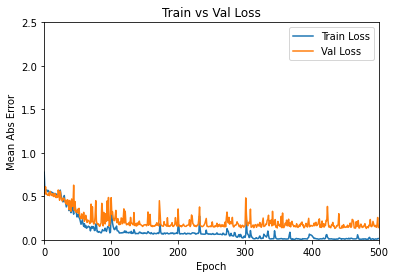

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot()
ax.plot(history.epoch, np.array(history.history['mae']),
           label='Train Loss')
ax.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.title('Train vs Val Loss')
plt.legend()
plt.ylim([0, 2.5])
plt.xlim([0, 500])
plt.show()
fig.savefig(dataset + '_' + activation1 + '_' + activation2 + '_' + 'train_loss_Cycle_Phase.png', dpi=400, bbox_inches = "tight")

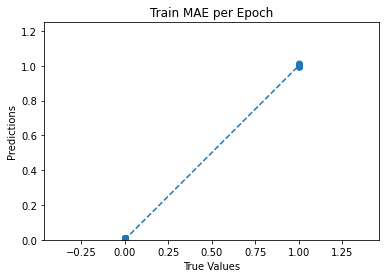

In [29]:
plt.scatter(y_train, train_pred, alpha = 0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.title('Train MAE per Epoch')
plt.xlim(0, 1)
plt.ylim(0, 1.25)
plt.plot([0, 1], [0,1], '--')
plt.savefig(dataset + '_' +activation1 + '_' + activation2 + '_' + 'true_vs_pred_train_Cycle_Phase.png', bbox_inches = "tight")

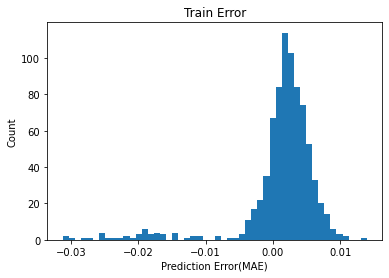

In [30]:
error = train_pred - y_train
plt.hist(error, bins = 50)
plt.title('Train Error')
plt.xlabel("Prediction Error(MAE)")
_ = plt.ylabel("Count")
plt.savefig(dataset + '_' + activation1 + '_' + activation2 + '_' + 'train_error_Cycle_Phase.png', bbox_inches = "tight")

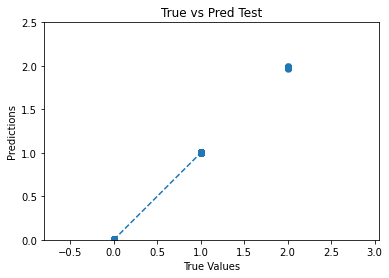

In [32]:
plt.scatter(y_train, train_pred, alpha = 0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.title('True vs Pred Test')
plt.xlim(-0.25, 2.5)
plt.ylim(0, 2.5)
plt.plot([0, 1], [0,1], '--')

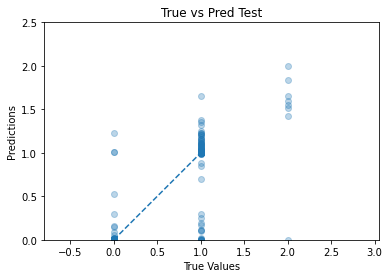

In [33]:
plt.scatter(y_val, pred, alpha = 0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.title('True vs Pred Test')
plt.xlim(-0.25, 2.5)
plt.ylim(0, 2.5)
plt.plot([0, 1], [0,1], '--')
plt.savefig(dataset + '_' + activation1 + '_' + activation2 + '_' + 'true_vs_pred_test_Cycle_Phase.png', bbox_inches = "tight")

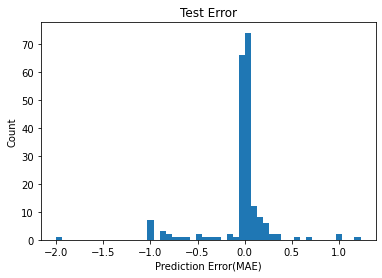

In [34]:
error = pred.flatten() - y_val.flatten()
plt.hist(error, bins = 50)
plt.title('Test Error')
plt.xlabel("Prediction Error(MAE)")
_ = plt.ylabel("Count")
plt.savefig(dataset + '_' + activation1 + '_' + activation2 + '_' + 'test_error_Cycle_Phase.png', bbox_inches = "tight")

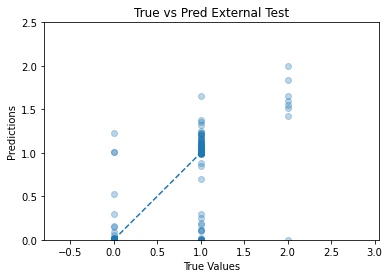

In [35]:
plt.scatter(y_val.flatten(), pred.flatten(), alpha = 0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.title('True vs Pred External Test')
plt.xlim(-0.25, 2.5)
plt.ylim(0, 2.5)
plt.plot([0, 1], [0,1], '--')

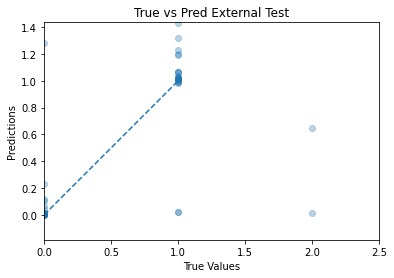

In [36]:
plt.scatter(y_test2.flatten(), pred_ext.flatten(), alpha = 0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.title('True vs Pred External Test')
plt.xlim(0, 2.5)
plt.ylim(0, 1.25)
plt.plot([0, 1], [0,1], '--')
#plt.savefig(dataset + '_' + activation1 + '_' + activation2 + '_' + 'true_vs_pred_external_test_Cycle_Phase.png', bbox_inches = "tight")

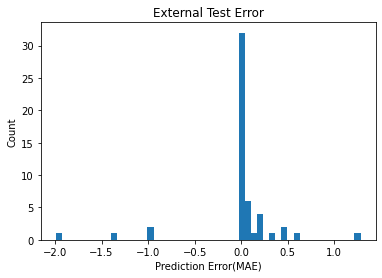

In [37]:
error = pred_ext.flatten() - y_test2.flatten()
plt.hist(error, bins = 50)
plt.title('External Test Error')
plt.xlabel("Prediction Error(MAE)")
_ = plt.ylabel("Count")
plt.savefig(dataset + '_' + activation1 + '_' + activation2 + '_' + 'external_test_error_Cycle_Phase.png', bbox_inches = "tight")

## Still Need to set up this pipeline  

In [38]:
test_pred_int = np.where(pred<0.5, 0, 1)
train_pred_int = np.where(train_pred<0.5, 0, 1)
ext_test_pred_int = np.where(pred_ext<0.5, 0, 1)

In [ ]:
np.set_printoptions(precision=2)
pred_ext

In [ ]:
a = np.where(pred_ext<0.5, 0, '')
a = np.where((0.5<pred_ext) & (pred_ext>1.5), 0, 1)
a

In [ ]:
from sklearn.metrics import confusion_matrix
test_conf = confusion_matrix(y_val, test_pred_int)
train_conf = confusion_matrix(y_train, train_pred_int)
ext_test_conf = confusion_matrix(y_test2, ext_test_pred_int)

In [ ]:
import collections
collections.Counter(y_train)

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(train_conf, range(3), range(3))
#df_cm = df_cm.rename(index={0: "PE", 1: "Case"})
#df_cm = df_cm.rename(columns={0: "Control", 1: "Case"})
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Training Confusion Matrix')
plt.tight_layout()
plt.savefig(dataset + '_' + activation1 + '_' + activation2 + '_' + 'confusion_matrix_train_Cycle_Phase.png', bbox_inches = "tight")

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(test_conf, range(3), range(3))
#df_cm = df_cm.rename(index={0: "Control", 1: "Case"})
#df_cm = df_cm.rename(columns={0: "Control", 1: "Case"})
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Testing Confusion Matrix')
plt.tight_layout()
plt.savefig(dataset + '_' + activation1 + '_' + activation2 + '_' + 'confusion_matrix_val_Cycle_Phase.png', bbox_inches = "tight")

In [ ]:
df_cm = pd.DataFrame(ext_test_conf, range(3), range(3))
#df_cm = df_cm.rename(index={0: "Control", 1: "Case"})
#df_cm = df_cm.rename(columns={0: "Control", 1: "Case"})
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Testing Confusion Matrix')
plt.tight_layout()
plt.savefig(dataset + '_' + activation1 + '_' + activation2 + '_' + 'confusion_matrix_external_test_Cycle_Phase.png', bbox_inches = "tight")

In [ ]:
def get_auc(test_auc, train_auc):
    auc_score = roc_auc_score(test_auc, train_auc)
    return auc_score

In [ ]:
from mlxtend.evaluate import feature_importance_permutation

In [ ]:
imp_vals, imp_all = feature_importance_permutation(
    predict_method = model.predict,
    X = x_test2,
    y = y_test2,
    metric =  get_auc,
    num_rounds = 1)

In [ ]:
get_auc(y_test2, pred_ext)

In [ ]:
imp_vals.shape

In [ ]:
indices = np.argsort(imp_vals)[::-1]

In [ ]:
indices

In [ ]:
imp_vals[indices][:20]

In [ ]:
plt.figure()
plt.title("Feature Extract Model Feature Importance")
plt.ylabel('Avg drop in AUC')
plt.bar(range(x_train.shape[1]), imp_vals[indices])

plt.xticks(range(x_train.shape[1]), x_train_df.columns[indices], rotation=90)
plt.xlim([-1, 20])
plt.ylim([0, 0.01])

plt.tight_layout()
plt.savefig('Feature Importance_Cycle_Phase.png')
plt.show()

In [ ]:
cpg_islands = x_train_df.columns[indices][:50]

In [ ]:
with open("top_50_cpg_islands.txt","w") as f:
    for line in cpg_islands:
        f.write(line)
        f.write("\n")

In [ ]:
indices

In [ ]:
top_500 = x_train_df.columns[indices][:500]

In [ ]:
top_500_df = x_train_df.loc[:,top_500]

In [ ]:
df = pd.concat([train, test, test2])

In [ ]:
top_500_df = df.loc[:,top_500]

In [ ]:
top_500_df

In [ ]:
df['Endometriosis_int']

In [ ]:
col = dict(zip(df['Endometriosis'].unique(), "rbg"))

In [ ]:
#Top 500 CPG
row_colors = df['Endometriosis'].map(col)
g = sns.clustermap(top_500_df, row_colors=row_colors, standard_scale=1)

In [ ]:
#Top 100
row_colors = df['Endometriosis'].map(col)
g = sns.clustermap(top_500_df.iloc[:,:100], row_colors=row_colors, standard_scale=2)

In [ ]:
#Top 50
row_colors = df['Endometriosis'].map(col)
g = sns.clustermap(top_500_df.iloc[:,:50], row_colors=row_colors, standard_scale=1)